In [36]:
import os
import random
import scipy.io
import pandas as pd

In [52]:
mat = scipy.io.loadmat('archive/Indoor_signals_1m/2_58G_1m/data1001.mat')
mat['sig1'][0][0]

(0.003753662109375+0.000762939453125j)

#### Reading 100 random files from 1 folder

In [37]:
directory = 'archive/Indoor_signals_1m/2_58G_1m'

files = [f for f in os.listdir(directory) if f.endswith('.mat')]

selected_files = random.sample(files, 100)
mats = [scipy.io.loadmat(os.path.join(directory, f)) for f in selected_files]

df = f = pd.DataFrame()

for mat in  mats:

    data = mat['sig1']
    single_column = pd.DataFrame(data)
    single_column = single_column.transpose()
    df = pd.concat([df, single_column], axis=1)
df.columns = range(df.shape[1])
print(df.head())


                   0                   1                   2    
0 -0.000458+0.000214j -0.000031+0.000519j -0.002319+0.001709j  \
1  0.000305-0.000366j -0.000214+0.000549j -0.003052-0.001099j   
2 -0.000031+0.000183j -0.001495-0.000122j -0.000610-0.002991j   
3  0.000031+0.000092j  0.000366-0.001068j  0.002472-0.001373j   
4  0.000061+0.000793j  0.001495+0.000244j  0.001831+0.001068j   

                   3                   4                   5    
0  0.000275+0.000397j  0.000580+0.000031j  0.000549-0.000397j  \
1  0.000000-0.000244j  0.000092-0.000031j -0.000122+0.000244j   
2 -0.000031-0.000244j -0.000275+0.000458j -0.000702+0.000275j   
3 -0.000641-0.000275j  0.000061+0.000275j -0.000336+0.000000j   
4  0.000397-0.000031j  0.000000-0.000458j  0.000336+0.000031j   

                   6                   7                   8    
0 -0.000702+0.000000j -0.002838+0.000427j  0.000275+0.000397j  \
1 -0.000641+0.000244j -0.000977-0.003113j  0.000214+0.000244j   
2  0.000061-0.000732j  

#### Filtring imaginary and real parts into tuples of 1 column (1 file)

In [38]:
column_0 = df[0].apply(lambda x: complex(x))
real_parts = tuple(column_0.apply(lambda x: x.real))
imaginary_parts = tuple(column_0.apply(lambda x: x.imag))


#### Making 3 Graphs
1. Real parts(n)
2. Imaginary parts(n)
3. Real parts(Imaginary parts) 

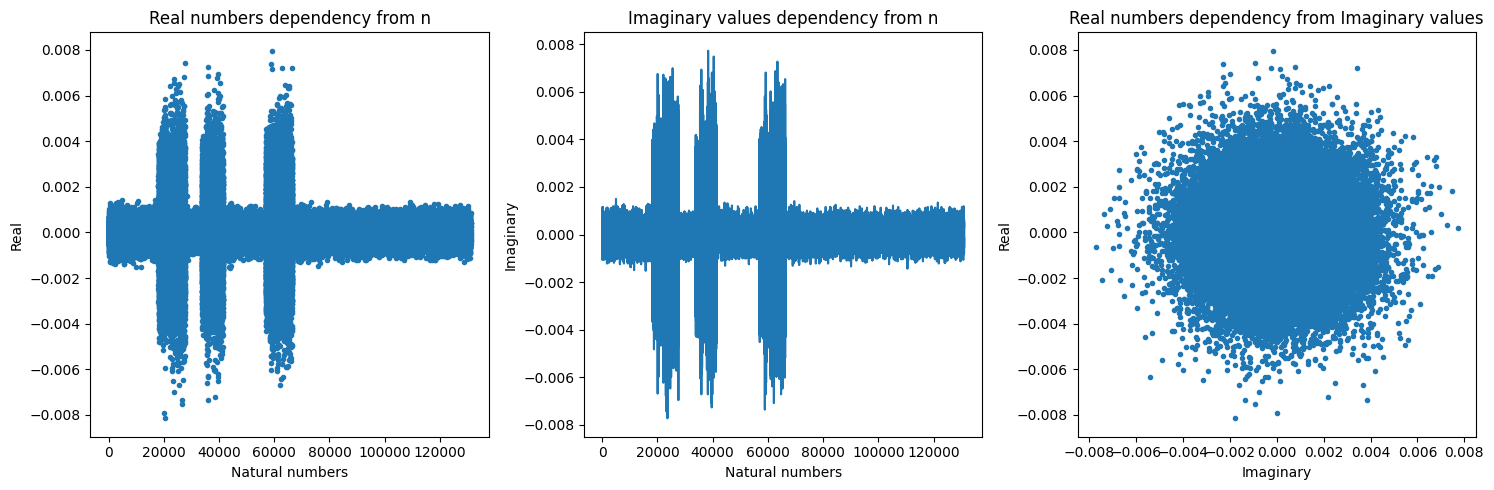

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of natural numbers from 1 to n
n_values = np.arange(1, len(real_parts) + 1)

# Create the plots
plt.figure(figsize=(15, 5))

# Plot 1: First tuple dependency from n natural number
plt.subplot(1, 3, 1)
plt.plot(n_values, real_parts, linestyle='', marker='.')
plt.title('Real numbers dependency from n')
plt.xlabel('Natural numbers')
plt.ylabel('Real')

# Plot 2: Second tuple dependency from n natural number
plt.subplot(1, 3, 2)
plt.plot(n_values, imaginary_parts)
plt.title('Imaginary values dependency from n')
plt.xlabel('Natural numbers')
plt.ylabel('Imaginary')

# Plot 3: First tuple dependency from second tuple
plt.subplot(1, 3, 3)
# plt.gca().set_prop_cycle(plt.cycler("color", ('r', 'orange', 'yellow', 'g', 'c', 'b', 'm', 'k')))
plt.plot(imaginary_parts, real_parts, linestyle='', marker='.')
plt.title('Real numbers dependency from Imaginary values')
plt.xlabel('Imaginary')
plt.ylabel('Real')


# Display the plots
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Real')

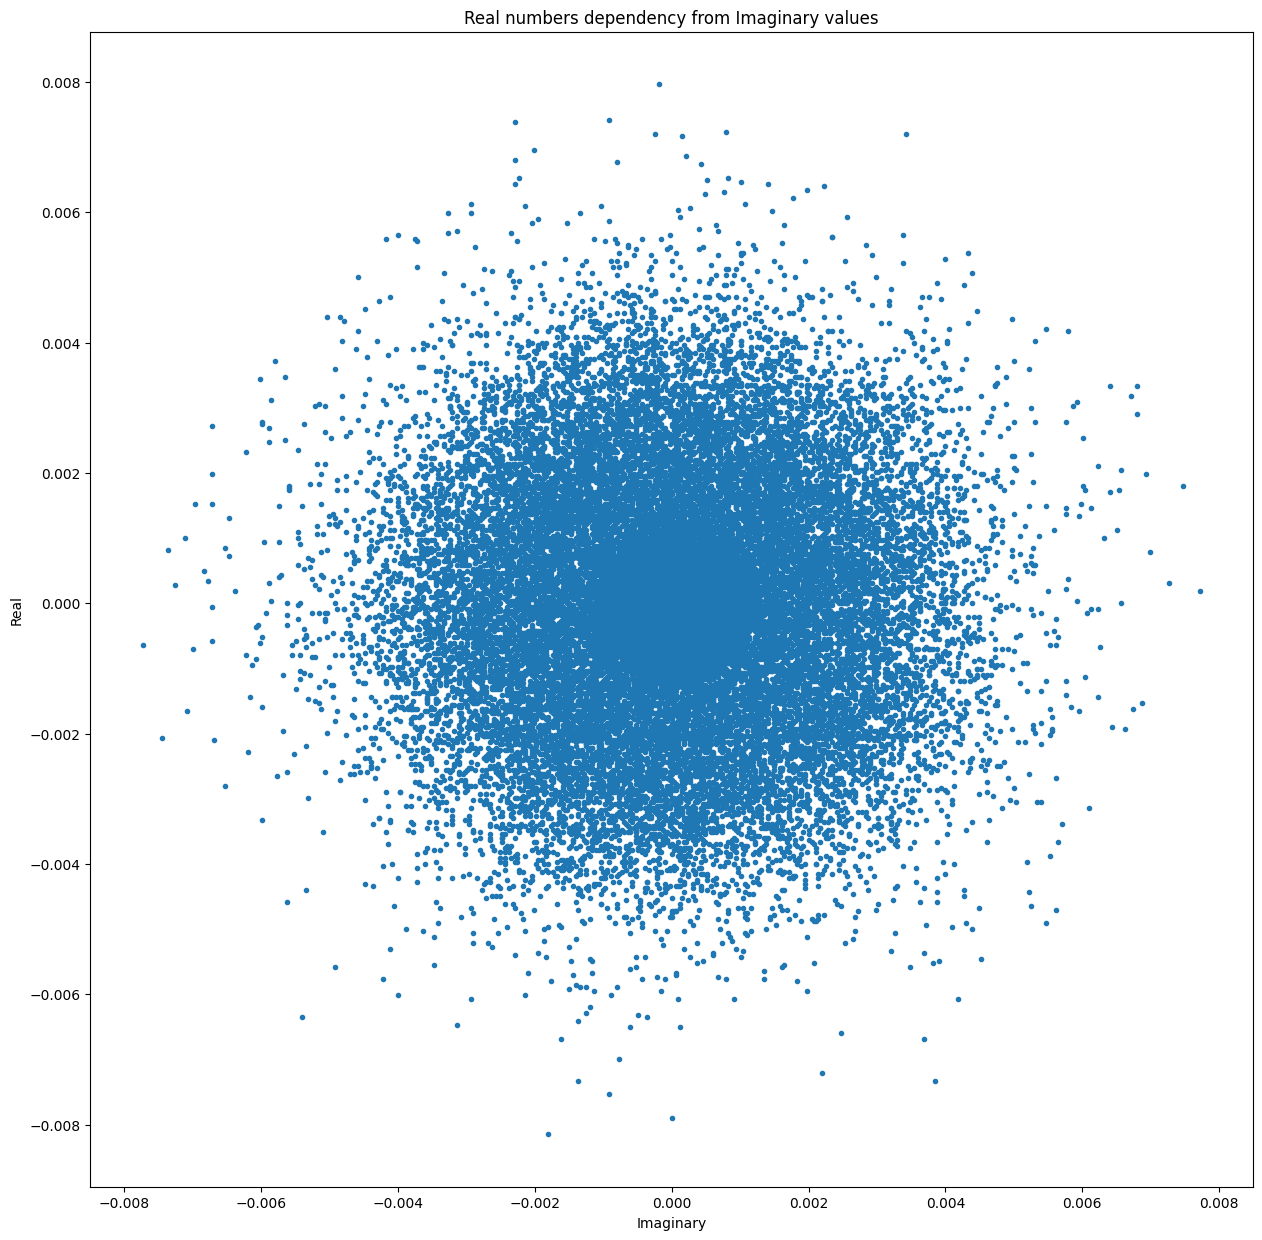

In [40]:
plt.figure(figsize=(15, 15))

plt.plot(imaginary_parts, real_parts, linestyle='', marker='.')
plt.title('Real numbers dependency from Imaginary values')
plt.xlabel('Imaginary')
plt.ylabel('Real')

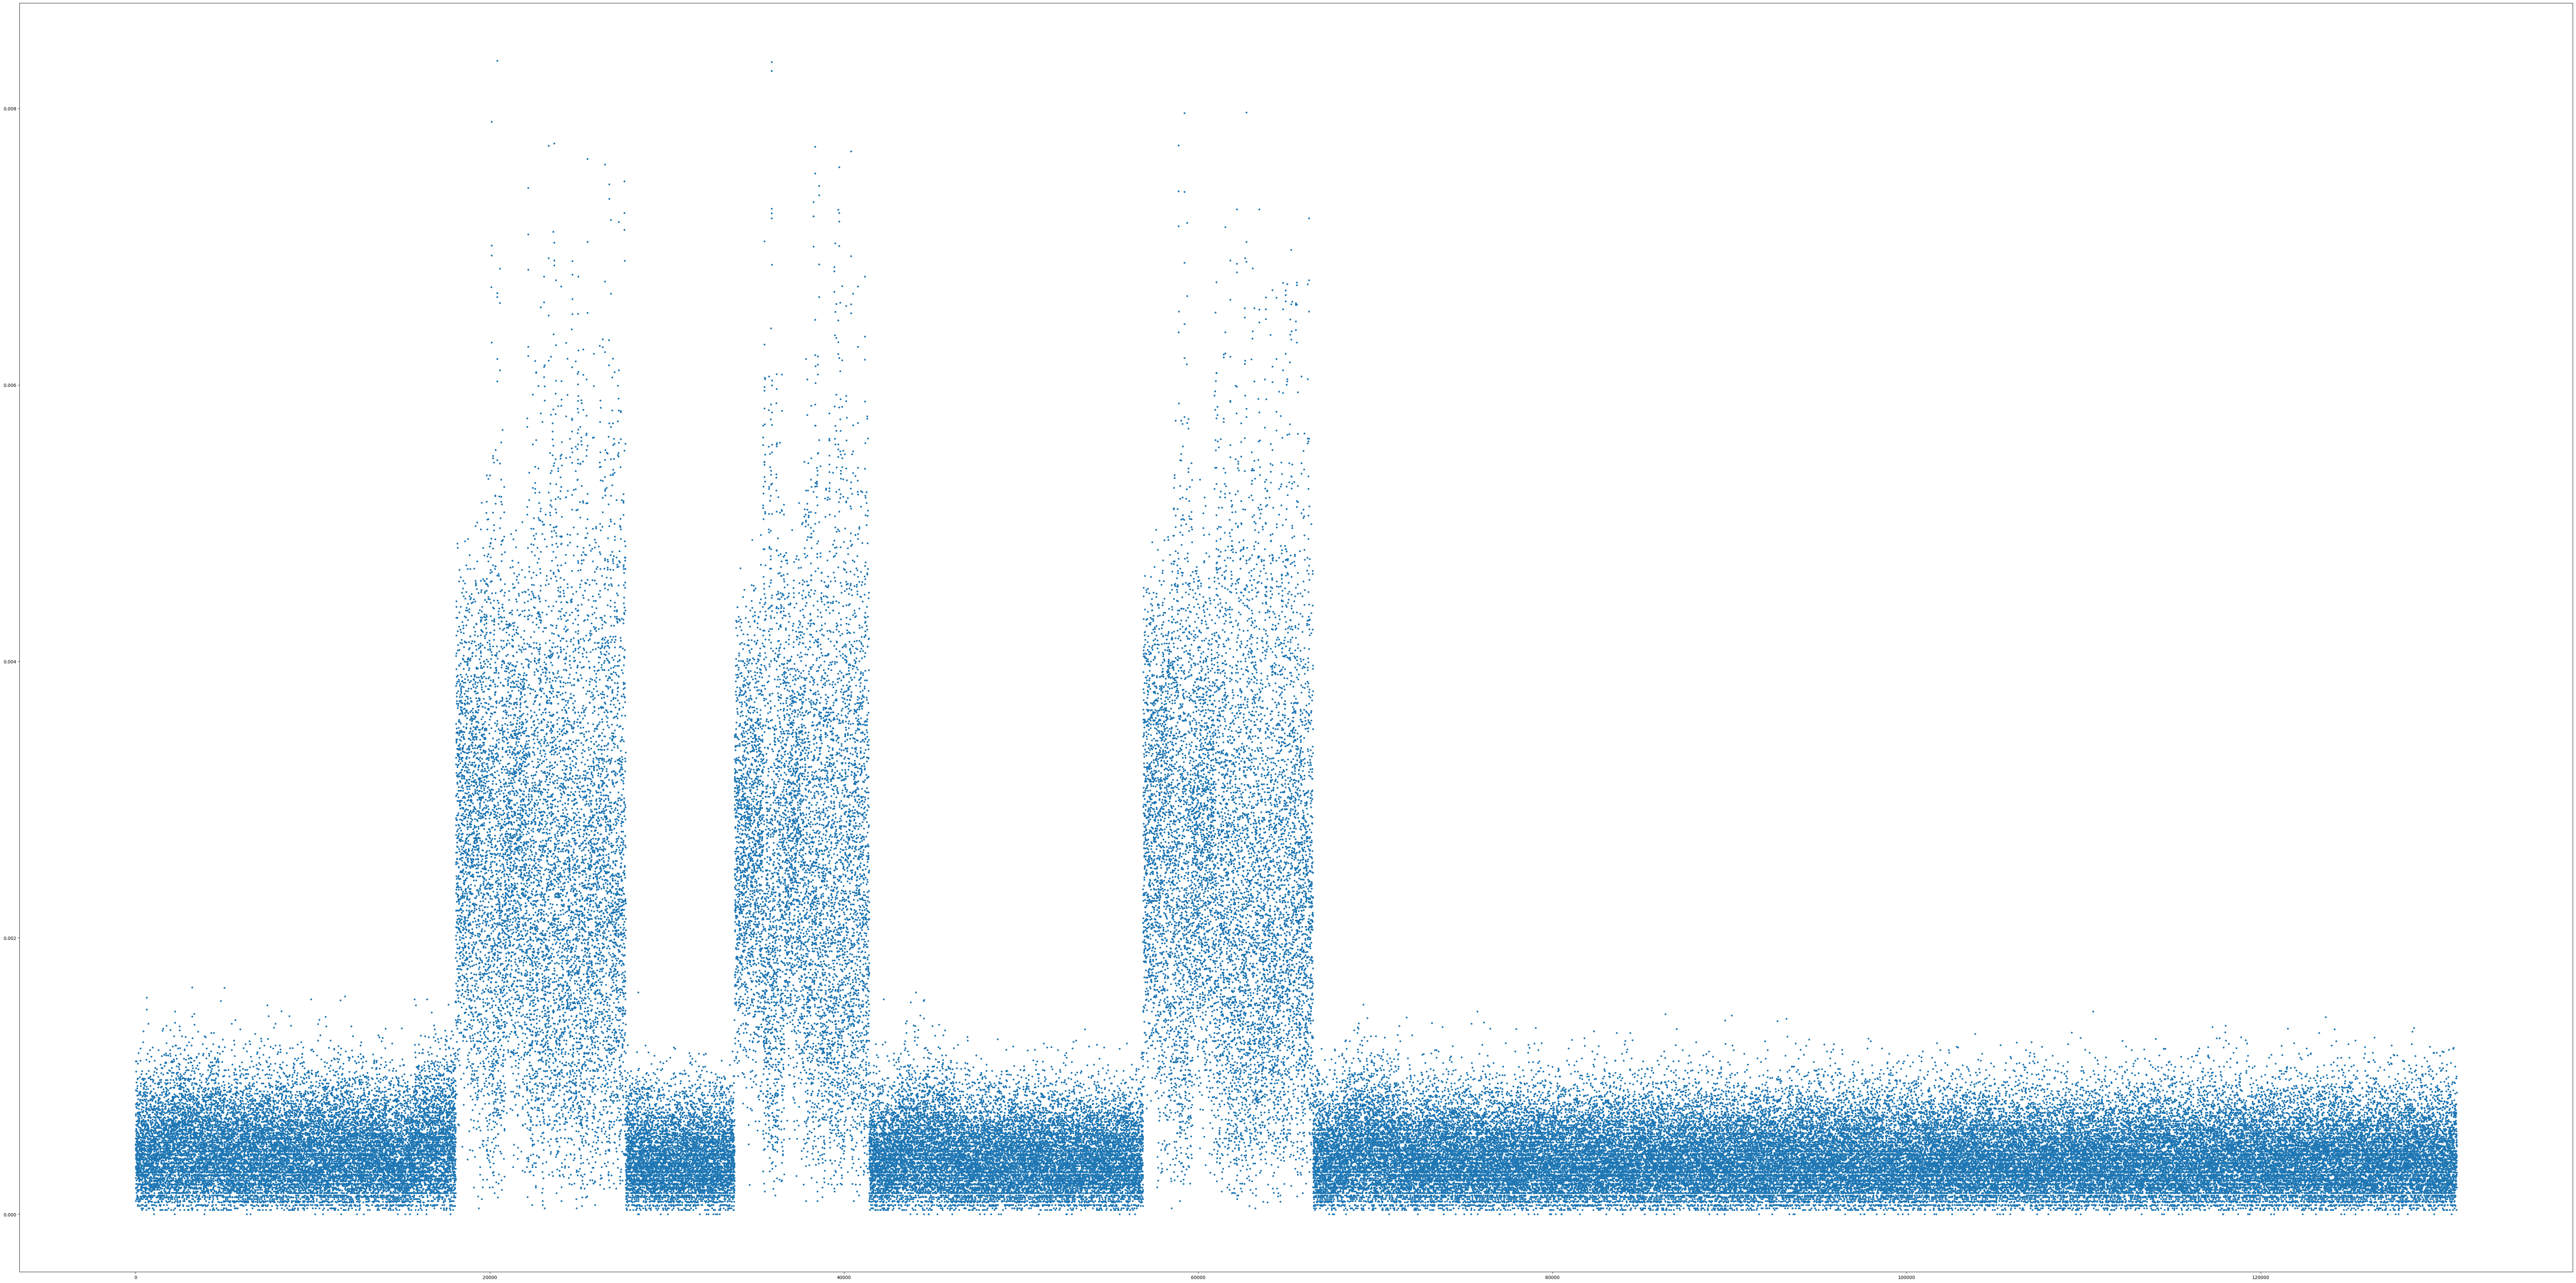

In [41]:
absolute_values = tuple(column_0.abs())
absolute_values

plt.figure(figsize=(100, 50))

plt.plot(n_values, absolute_values, linestyle='', marker='.')
plt.show()

In [42]:
tg_phi = tuple()
for i in range(len(real_parts)):
    if real_parts[i] != 0:
        tg_phi += (imaginary_parts[i] / real_parts[i], )
tg_phi

(-0.4666666666666667,
 -1.2,
 -6.0,
 3.0,
 13.0,
 0.45454545454545453,
 2.75,
 0.4090909090909091,
 -18.0,
 1.0,
 0.4444444444444444,
 1.4,
 -0.7692307692307693,
 7.0,
 -0.09090909090909091,
 -1.625,
 0.1724137931034483,
 0.25,
 -0.4782608695652174,
 -0.9,
 -1.1428571428571428,
 0.0,
 -0.6785714285714286,
 -1.0,
 -6.5,
 -3.0,
 -7.0,
 1.0,
 -0.6666666666666666,
 13.0,
 -0.6153846153846154,
 0.15384615384615385,
 -0.3333333333333333,
 5.0,
 -0.3076923076923077,
 -1.5,
 6.666666666666667,
 -1.5,
 -0.7333333333333333,
 -0.8214285714285714,
 0.12903225806451613,
 11.0,
 -0.06666666666666667,
 0.5714285714285714,
 4.5,
 1.75,
 0.10526315789473684,
 0.25,
 -0.11538461538461539,
 0.5,
 -5.0,
 -0.09090909090909091,
 0.05555555555555555,
 -5.666666666666667,
 -0.375,
 -1.3333333333333333,
 -0.8,
 -1.6,
 -4.0,
 1.5,
 0.6666666666666666,
 -3.25,
 2.5,
 2.0,
 -0.2222222222222222,
 -8.333333333333334,
 -0.5,
 -0.29411764705882354,
 1.6,
 -3.8,
 0.1,
 -0.14285714285714285,
 0.8,
 0.6153846153846154,


In [43]:
print(len(real_parts))
print(len(tg_phi))


131072
127232


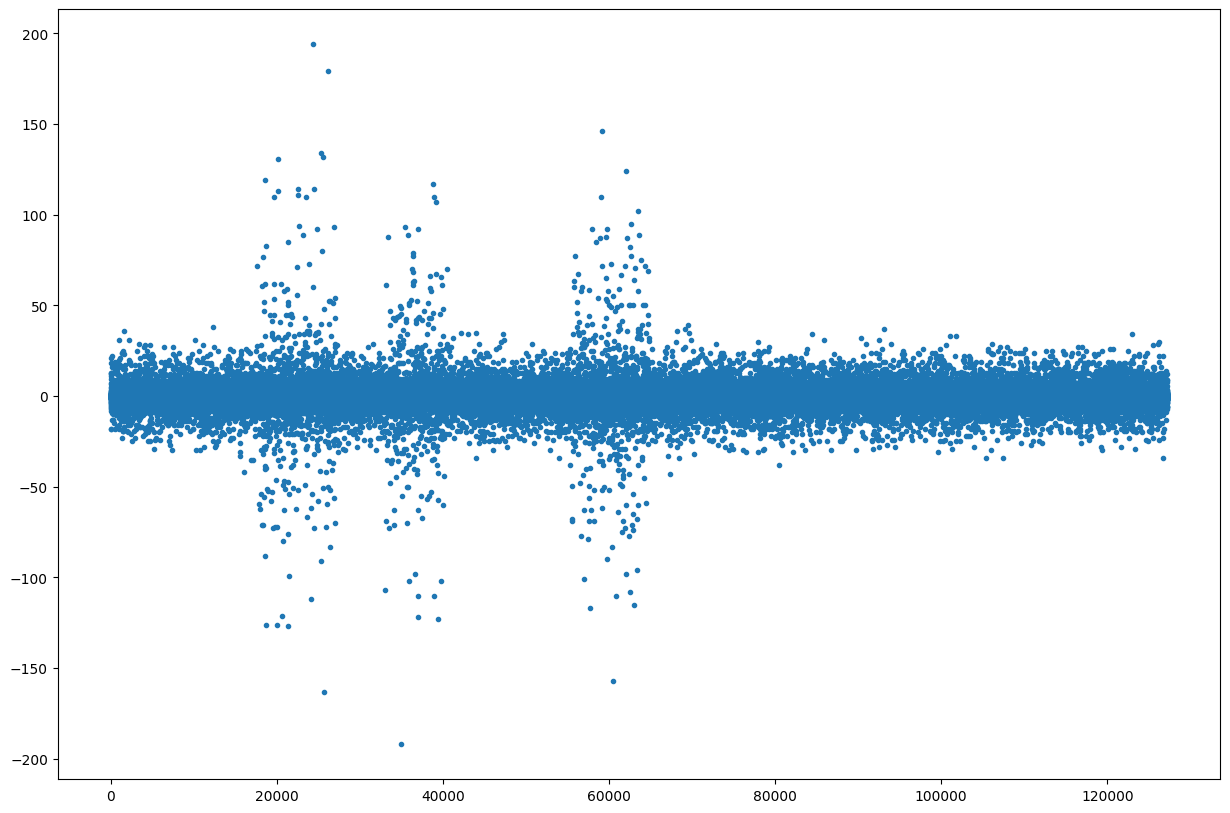

In [44]:
new_values = np.arange(1, len(tg_phi) + 1)
plt.figure(figsize=(15, 10))

plt.plot(new_values, tg_phi, linestyle='', marker='.')
plt.show()